In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

# Load the red-wine.csv file into a DataFrame
path = "/content/drive/MyDrive/red_wine.csv"
df = pd.read_csv(path)

# Generate a pandas profiling report
profiling_file= ProfileReport(df, title='Red Wine Data Profile Report')

# Save the report as an HTML file
profiling_file.to_file(output_file='red_wine_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Load the red-wine.csv file into a DataFrame
path = "/content/drive/MyDrive/red_wine.csv"
df = pd.read_csv(path)

# Split the dataset into features and target
X = df.drop('type', axis=1)
y = df['type']

# Define the models to fit
classifiers = {
    'ZeroR': DummyClassifier(strategy='most_frequent'),
    'OneR': DecisionTreeClassifier(max_depth=1),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Fit each model using 10-fold cross-validation and report performance metrics
results = []
for name, model in classifiers.items():
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    auc_scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
    mean_score = scores.mean()
    mean_auc = auc_scores.mean()
    results.append((name, mean_score, mean_auc))

# Convert the results to a Pandas DataFrame and print it
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy (mean)', 'AUC (mean)'])
print(results_df)

                    Model  Accuracy (mean)  AUC (mean)
0                   ZeroR         0.528887    0.500000
1                    OneR         0.798790    0.802581
2     Logistic Regression         0.784785    0.879902
3             Naive Bayes         0.821627    0.895408
4           Decision Tree         0.758500    0.751305
5  Support Vector Machine         0.535844    0.868920
6           Random Forest         0.800544    0.892978


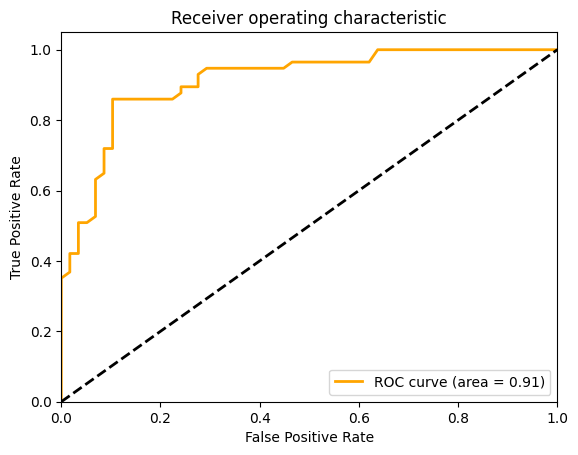

In [ ]:
from matplotlib import get_backend
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

# Load the red-wine.csv file into a DataFrame
path = "/content/drive/MyDrive/red_wine.csv"
df = pd.read_csv(path)

# Encode the target variable 'type'(0 and 1)
l = LabelEncoder()
df['type'] = l.fit_transform(df['type'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('type', axis=1), df['type'], test_size=0.2, random_state=42)

# Fit the model to the training data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict the probabilities for the test data
y_pred_result = rf.predict_proba(X_test)

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_result[:,1])

# Compute the AUC score
roc_auc_result = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_result)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Load the white-wine.csv file into a DataFrame
path = "/content/drive/MyDrive/white_wine.csv"
df = pd.read_csv(path)

# Split the dataset into features and target
Y = df.drop('type', axis=1)
Z = df['type']

# Define the models to fit
classifiers = {
    'Naive Bayes': GaussianNB()
}

# Fit each model using 10-fold cross-validation and report performance metrics
results = []
for name, model in classifiers.items():
    scores = cross_val_score(model, Y, Z, cv=10, scoring='accuracy')
    auc_scores = cross_val_score(model, Y, Z, cv=10, scoring='roc_auc')
    mean_score_result = scores.mean()
    mean_auc_result = auc_scores.mean()
    results.append((name, mean_score_result, mean_auc_result))
# Convert the results to a Pandas DataFrame and print it
results_df123 = pd.DataFrame(results, columns=['Model', 'Accuracy (mean)', 'AUC(mean)'])
print(results_df123)

         Model  Accuracy (mean)  AUC(mean)
0  Naive Bayes         0.932143       0.95
